**CIV1498 - Introduction to Data Science**
<br> **Project 2**
<br> **Group: Fuzzy Data Corp**

## Setup Notebook

In [4]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Bike Share Data

Import bike share data

In [2]:
# Get bike share file names
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

Create a variable and assign a DataFrame to it that contains the bike share data from the .csv files.

In [3]:
# 2017 and 2018 data
ride_data_1718 = pd.DataFrame({})
trips_filenames_1718 = trips_filenames[0:23];

for file in trips_filenames_1718:
    data = pd.read_csv(file)
    ride_data_1718 = pd.concat([ride_data_1718,data], axis = 0)

# change column names to match the 2019-21 data
ride_data_1718.rename(columns = {"trip_id": "Trip Id",
                                 'trip_start_time':'Start Time',
                                 'trip_stop_time':'End Time',
                                 'trip_duration_seconds':'Trip Duration',
                                 'from_station_id':'Start Station Id',
                                 'from_station_name':'Start Station Name',
                                 'to_station_id':'End Station Id',
                                 'to_station_name':'End Station Name',
                                 'user_type':'User Type'}, inplace = True)

ride_data_1718.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
0,712441,2017-01-01 05:03 (UTC),2017-01-01 05:08 (UTC),274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442,2017-01-01 05:03 (UTC),2017-01-01 05:12 (UTC),538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443,2017-01-01 05:05 (UTC),2017-01-01 05:22 (UTC),992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444,2017-01-01 05:09 (UTC),2017-01-01 05:26 (UTC),1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445,2017-01-01 05:14 (UTC),2017-01-01 05:25 (UTC),645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


In [5]:
# 2019-2021 data
ride_data_192021 = pd.DataFrame({})
trips_filenames_192021 = trips_filenames[24:];

for file in trips_filenames_192021:
    data = pd.read_csv(file)
    ride_data_192021 = pd.concat([ride_data_192021,data], axis = 0)             

# Let's remove double spaces from the column names
ride_data_192021.columns = [' '.join(col.split()) for col in ride_data_192021.columns]  
    
# View DataFrame
ride_data_192021.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,ï»¿Trip Id
0,4581278.0,199751.0,1547,7021,01/01/2019 00:08:00 (EST),Bay St / Albert St,7233.0,01/01/2019 00:33:00 (EST),King / Cowan Ave - SMART,1296.0,Annual Member,NaN
1,4581279.0,294730.0,1112,7160,01/01/2019 00:10:00 (EST),King St W / Tecumseth St,7051.0,01/01/2019 00:29:00 (EST),Wellesley St E / Yonge St (Green P),2947.0,Annual Member,NaN
2,4581280.0,197252.0,589,7055,01/01/2019 00:15:00 (EST),Jarvis St / Carlton St,7013.0,01/01/2019 00:25:00 (EST),Scott St / The Esplanade,2293.0,Annual Member,NaN
3,4581281.0,171700.0,259,7012,01/01/2019 00:16:00 (EST),Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20:00 (EST),Bay St / College St (West Side) - SMART,283.0,Annual Member,NaN
4,4581282.0,306314.0,281,7041,01/01/2019 00:19:00 (EST),Edward St / Yonge St,7257.0,01/01/2019 00:24:00 (EST),Dundas St W / St. Patrick St,1799.0,Annual Member,NaN


Check shape of dataframes

In [6]:
ride_data_1718.shape

(3160323, 9)

In [7]:
ride_data_192021.shape

(8780158, 12)

**Clean Data**

*Drop the columns in 192021 that are not in 1718*

In [8]:
ride_data_192021 = ride_data_192021.drop(columns = ['Subscription Id','ï»¿Trip Id','Bike Id'])
ride_data_192021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,4581278.0,1547,7021,01/01/2019 00:08:00 (EST),Bay St / Albert St,7233.0,01/01/2019 00:33:00 (EST),King / Cowan Ave - SMART,Annual Member
1,4581279.0,1112,7160,01/01/2019 00:10:00 (EST),King St W / Tecumseth St,7051.0,01/01/2019 00:29:00 (EST),Wellesley St E / Yonge St (Green P),Annual Member
2,4581280.0,589,7055,01/01/2019 00:15:00 (EST),Jarvis St / Carlton St,7013.0,01/01/2019 00:25:00 (EST),Scott St / The Esplanade,Annual Member
3,4581281.0,259,7012,01/01/2019 00:16:00 (EST),Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20:00 (EST),Bay St / College St (West Side) - SMART,Annual Member
4,4581282.0,281,7041,01/01/2019 00:19:00 (EST),Edward St / Yonge St,7257.0,01/01/2019 00:24:00 (EST),Dundas St W / St. Patrick St,Annual Member


*Get all the data in the same datetime format:*
<br> (1) remove the UTC from 1718 data

In [9]:
ride_data_1718['Start Time'] = ride_data_1718['Start Time'].str.replace(' (UTC)','', regex = False)
ride_data_1718['End Time'] = ride_data_1718['End Time'].str.replace(' (UTC)','', regex = False)
ride_data_1718.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
0,712441,2017-01-01 05:03,2017-01-01 05:08,274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442,2017-01-01 05:03,2017-01-01 05:12,538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443,2017-01-01 05:05,2017-01-01 05:22,992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444,2017-01-01 05:09,2017-01-01 05:26,1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445,2017-01-01 05:14,2017-01-01 05:25,645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


(2) Convert columns 'Start Time' and 'End Time' to datetimes.
<br> (3) Localize 'Start Time' and 'End Time' to UTC  

In [10]:
ride_data_1718['Start Time'] = pd.to_datetime(ride_data_1718['Start Time'])
ride_data_1718['End Time'] = pd.to_datetime(ride_data_1718['End Time'])

ride_data_1718['Start Time'] = ride_data_1718['Start Time'].dt.tz_localize('UTC')
ride_data_1718['End Time'] = ride_data_1718['End Time'].dt.tz_localize('UTC')

# View DataFrame
ride_data_1718.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
0,712441,2017-01-01 05:03:00+00:00,2017-01-01 05:08:00+00:00,274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442,2017-01-01 05:03:00+00:00,2017-01-01 05:12:00+00:00,538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443,2017-01-01 05:05:00+00:00,2017-01-01 05:22:00+00:00,992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444,2017-01-01 05:09:00+00:00,2017-01-01 05:26:00+00:00,1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445,2017-01-01 05:14:00+00:00,2017-01-01 05:25:00+00:00,645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


(4) Convert to EST

In [11]:
ride_data_1718['Start Time'] = ride_data_1718['Start Time'].dt.tz_convert('EST')
ride_data_1718['End Time'] = ride_data_1718['End Time'].dt.tz_convert('EST')
ride_data_1718.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
0,712441,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


(5) remove the 'EST' from the 192021 data

In [12]:
ride_data_192021['Start Time'] = ride_data_192021['Start Time'].str.replace(' (EST)','', regex = False)
ride_data_192021['End Time'] = ride_data_192021['End Time'].str.replace(' (EST)','', regex = False)
ride_data_192021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,4581278.0,1547,7021,01/01/2019 00:08:00,Bay St / Albert St,7233.0,01/01/2019 00:33:00,King / Cowan Ave - SMART,Annual Member
1,4581279.0,1112,7160,01/01/2019 00:10:00,King St W / Tecumseth St,7051.0,01/01/2019 00:29:00,Wellesley St E / Yonge St (Green P),Annual Member
2,4581280.0,589,7055,01/01/2019 00:15:00,Jarvis St / Carlton St,7013.0,01/01/2019 00:25:00,Scott St / The Esplanade,Annual Member
3,4581281.0,259,7012,01/01/2019 00:16:00,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20:00,Bay St / College St (West Side) - SMART,Annual Member
4,4581282.0,281,7041,01/01/2019 00:19:00,Edward St / Yonge St,7257.0,01/01/2019 00:24:00,Dundas St W / St. Patrick St,Annual Member


(6) Convert columns 'Start Time' and 'End Time' to datetimes.
<br> (7) Localize 'Start Time' and 'End Time' to EST

In [13]:
ride_data_192021['Start Time'] = pd.to_datetime(ride_data_192021['Start Time'])
ride_data_192021['End Time'] = pd.to_datetime(ride_data_192021['End Time'])

ride_data_192021['Start Time'] = ride_data_192021['Start Time'].dt.tz_localize('EST')
ride_data_192021['End Time'] = ride_data_192021['End Time'].dt.tz_localize('EST')

# View DataFrame
ride_data_192021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,4581278.0,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,Annual Member
1,4581279.0,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),Annual Member
2,4581280.0,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,Annual Member
3,4581281.0,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,Annual Member
4,4581282.0,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,Annual Member


*Combine the 1718 and 192021 data*

In [15]:
blahblah = pd.concat([ride_data_1718, ride_data_192021]).reset_index(drop=True)

In [16]:
# check shape
blahblah.shape

(11940481, 9)

Note: 11949481 = 8780158 (192021) + 3160323 (1718)

In [ ]:
# save the combined data as a .csv
#blahblah.to_csv(path_or_buf = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\blahblah.csv',index = False )

*Filter for 'Annual Member' users (because those are people who are more likely to be using the bikes for communiting to work)*

In [18]:
blahblah['User Type'].unique()

array(['Member', 'Casual', 'Annual Member', 'Casual Member'], dtype=object)

In [19]:
blahblah['User Type'].value_counts()

Annual Member    7129517
Casual Member    3318595
Member           1164784
Casual            327585
Name: User Type, dtype: int64

Note: only want 'Annual Member' and 'Member' = 8294301 entries

In [20]:
Annual_Rides = blahblah[(blahblah['User Type'] == 'Member') | (blahblah['User Type'] == 'Annual Member')]
Annual_Rides.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
0,712441.0,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442.0,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443.0,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444.0,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445.0,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


In [21]:
Annual_Rides.shape

(8294301, 9)

*Check Annual_Rides start time*
<br>(bc first time running below time plot it had 2016-12-31 data)

In [22]:
AR_start = Annual_Rides.sort_values(by = 'Start Time', ascending = True)
AR_start.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
345706,712382.0,2016-12-31 20:00:00-05:00,2016-12-31 20:03:00-05:00,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
345707,712383.0,2016-12-31 20:00:00-05:00,2016-12-31 20:05:00-05:00,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
345708,712384.0,2016-12-31 20:05:00-05:00,2016-12-31 20:29:00-05:00,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
345709,712385.0,2016-12-31 20:07:00-05:00,2016-12-31 20:21:00-05:00,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
345710,712386.0,2016-12-31 20:08:00-05:00,2016-12-31 20:12:00-05:00,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member


Cut data from before 2017-01-01

In [23]:
Annual_Rides = Annual_Rides[Annual_Rides['Start Time'].dt.strftime('%Y-%m-%d') >= "2017-01-01"].sort_values(by = 'Start Time', ascending = True)
Annual_Rides.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type
0,712441.0,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442.0,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443.0,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444.0,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445.0,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


*Address missing data*

In [24]:
AR_missing = Annual_Rides.isnull().sum(axis = 0).to_frame('count')
AR_missing

,count
Trip Id,1731008
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,777473
Start Station Name,1764
End Station Id,779784
End Station Name,4133
User Type,0


(1) Fill the missing trip ids with random number (1) so it is still counted

In [25]:
Annual_Rides['Trip Id'] = Annual_Rides['Trip Id'].fillna(1)

In [26]:
AR_missing2 = Annual_Rides.isnull().sum(axis = 0).to_frame('count')
AR_missing2

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,777473
Start Station Name,1764
End Station Id,779784
End Station Name,4133
User Type,0


*Visualize Data to Filter Data by date/time*

(1) Generate plot to see if there is a drop in ridership due to COVID (~March 2020)

Text(0, 0.5, 'Daily Rides')

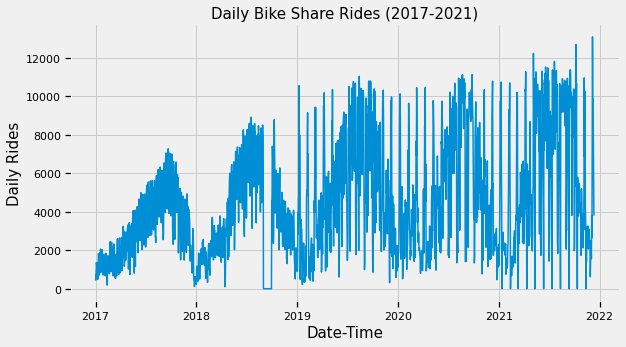

In [27]:
AR_plot = Annual_Rides.set_index('Start Time')
AR_plot = AR_plot.resample('D').count()['Trip Id']

plt.figure(figsize=(8.75, 4.75))
plt.plot(AR_plot)
plt.title('Daily Bike Share Rides (2017-2021)', fontsize=15)
plt.xlabel('Date-Time', fontsize=15)
plt.ylabel('Daily Rides', fontsize=15)

Note: If this above plot showed a drop in ridershipe after ~March 2020, then we would have dropped those data points due to the fact that COVID impacted ridership

(2) Generate plots to see the daily ride trends to see if there is a morning and evening spike (to indicate work commuting)

In [28]:
ALL_plot = Annual_Rides
ALL_plot_count = ALL_plot.set_index('Start Time')
ALL_plot_count = ALL_plot_count.resample('30min').count()['Trip Id']
ALL_plot_count.head()

Start Time
2017-01-01 00:00:00-05:00     9
2017-01-01 00:30:00-05:00     7
2017-01-01 01:00:00-05:00     8
2017-01-01 01:30:00-05:00     5
2017-01-01 02:00:00-05:00    10
Freq: 30T, Name: Trip Id, dtype: int64

In [29]:
ALL_plot_count = ALL_plot_count.to_frame()
ALL_plot_count = ALL_plot_count.reset_index()
ALL_plot_count['Time_Int'] = ALL_plot_count['Start Time'].dt.strftime('%H:%M')
ALL_plot_count.head()

,Start Time,Trip Id,Time_Int
0,2017-01-01 00:00:00-05:00,9,00:00
1,2017-01-01 00:30:00-05:00,7,00:30
2,2017-01-01 01:00:00-05:00,8,01:00
3,2017-01-01 01:30:00-05:00,5,01:30
4,2017-01-01 02:00:00-05:00,10,02:00


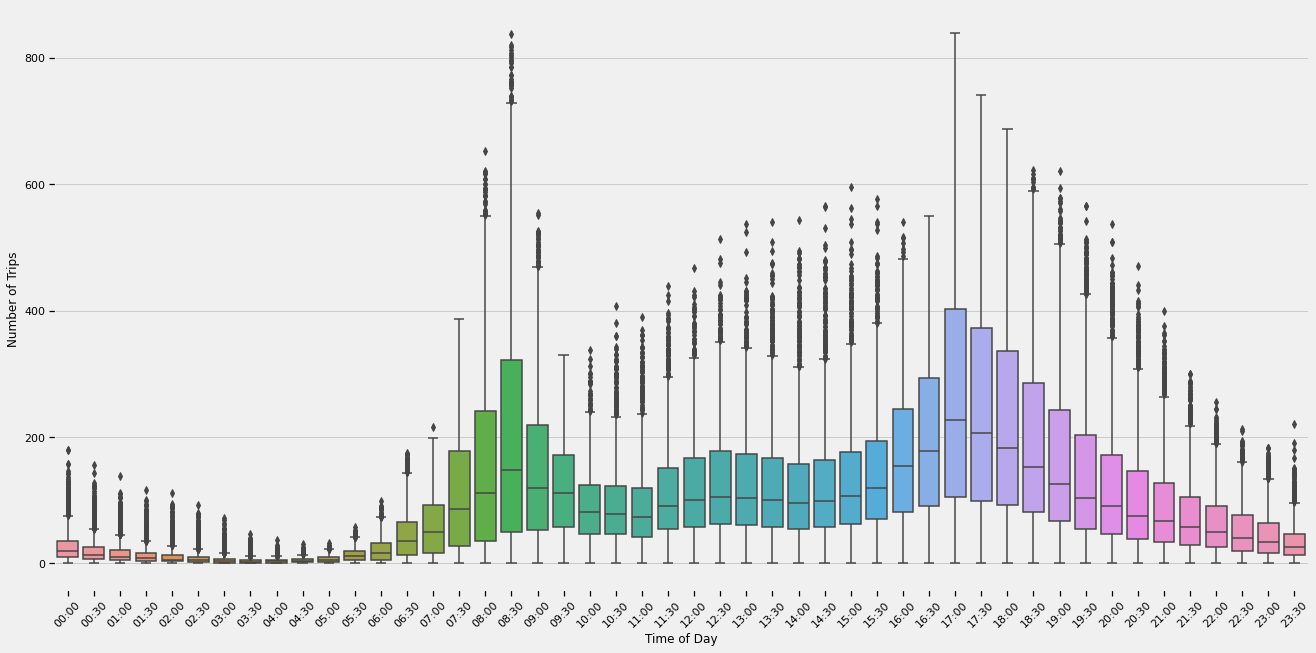

In [249]:
plt.figure(figsize = (20, 10))

sns.boxplot(x='Time_Int', y='Trip Id', data=ALL_plot_count).set(ylabel='Number of Trips', xlabel = 'Time of Day')

plt.xticks(rotation = 45)
plt.show()

Note: morning spike = 7:30-9:30 and evening spike = 16-18

In [31]:
data_list = [Annual_Rides, ALL_plot_count['Time_Int']]
Annual_Rides = pd.concat(data_list, axis = 1)
Annual_Rides.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Time_Int
0,712441.0,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274.0,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member,00:00
1,712442.0,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538.0,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member,00:30
2,712443.0,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992.0,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member,01:00
3,712444.0,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005.0,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member,01:30
4,712445.0,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645.0,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member,02:00


In [32]:
Annual_Rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8303282 entries, 0 to 11940480
Data columns (total 10 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Trip Id             float64            
 1   Start Time          datetime64[ns, EST]
 2   End Time            datetime64[ns, EST]
 3   Trip Duration       float64            
 4   Start Station Id    float64            
 5   Start Station Name  object             
 6   End Station Id      float64            
 7   End Station Name    object             
 8   User Type           object             
 9   Time_Int            object             
dtypes: datetime64[ns, EST](2), float64(4), object(4)
memory usage: 696.8+ MB


*Cut data not within peak hours*

In [33]:
AR_peakhrs = Annual_Rides[((Annual_Rides['Start Time'].dt.strftime("%H:%M:%S") >= "07:30:00") & 
                               (Annual_Rides['Start Time'].dt.strftime("%H:%M:%S") <= "09:30:00")) | 
                              ((Annual_Rides['Start Time'].dt.strftime("%H:%M:%S") >= "16:00:00") & 
                               (Annual_Rides['Start Time'].dt.strftime("%H:%M:%S") <= "18:00:00"))]
AR_peakhrs.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Time_Int
74,712517.0,2017-01-01 07:47:00-05:00,2017-01-01 07:50:00-05:00,155.0,7006.0,Bay St / College St (East Side),7012.0,Elizabeth St / Edward St (Bus Terminal),Member,13:00
75,712518.0,2017-01-01 08:01:00-05:00,2017-01-01 08:10:00-05:00,563.0,7064.0,51 Parliament St,7033.0,Union Station,Member,13:30
76,712519.0,2017-01-01 08:06:00-05:00,2017-01-01 08:16:00-05:00,555.0,7027.0,Beverly St / Dundas St W,7026.0,Bay St / St. Joseph St,Member,14:00
77,712520.0,2017-01-01 08:21:00-05:00,2017-01-01 08:27:00-05:00,342.0,7057.0,Simcoe St / Wellington St W,7168.0,Queens Quay / Yonge St,Member,14:30
78,712521.0,2017-01-01 08:23:00-05:00,2017-01-01 08:28:00-05:00,291.0,7120.0,Gerrard St E / River St,7104.0,King St E / River St,Member,15:00


In [34]:
AR_peakhrs.shape

(2733621, 10)

Note: initial Annual_Rides = 8,294,301 -> AR_peakhrs = 2,733,621 -> lost 5,560,680 rides

In [ ]:
# save the combined data as a .csv
# AR_peakhrs.to_csv(path_or_buf = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\AnnualRidership_PeakHours.csv',index = False )

*Check again if there is a pre- vs post-COVID ridership difference*

Text(0, 0.5, 'Daily Rides')

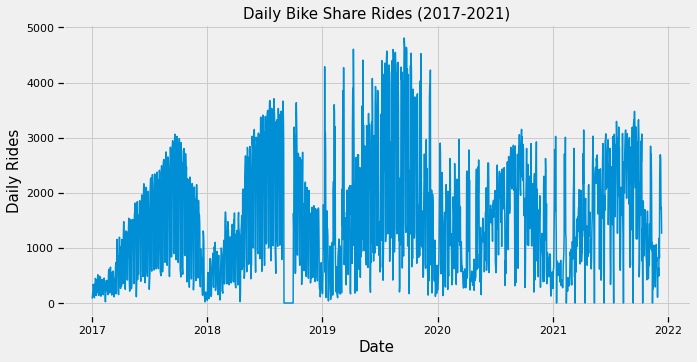

In [250]:
AR_peakhrs_plot = AR_peakhrs.set_index('Start Time')
AR_peakhrs_plot = AR_peakhrs_plot.resample('D').count()['Trip Id']

plt.figure(figsize=(10, 5))
plt.plot(AR_peakhrs_plot)
plt.title('Daily Bike Share Rides (2017-2021)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Rides', fontsize=15)

Note: again no distinct drop in ridership post-covid (after ~March 20, 2020) so will not drop any date data

*Check missing values again*

In [36]:
AR_peakhrs_missing = AR_peakhrs.isnull().sum(axis = 0).to_frame('count')
AR_peakhrs_missing

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,298402
Start Station Name,447
End Station Id,299106
End Station Name,1188
User Type,0
Time_Int,2709261


***

## Neighborhood Data

*Get station data*
<br>Get the station information from `https://tor.publicbikesystem.net`. (use requests)

In [37]:
response = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')
bikeshare_stations = pd.DataFrame(json.loads(response.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon', 'capacity']].astype({'station_id': 'int',})
bikeshare_stations = bikeshare_stations.rename(columns={'station_id': 'Station Id', 
                                                        'name': 'Station Name'})

# View DataFrame
bikeshare_stations.head()

,Station Id,Station Name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Wellesley Station Green P,43.664964,-79.383550,17
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,11


*Import Toronto Neighbourhoods shapefile*
<br>
<br> The shapefile for City of Toronto neighbourhood boundaries `'toronto_neighbourhoods.shp'` is given. 
<br>
<br> (1) Use `gpd.read_file()` to open it and save its contents to a new variables called `neighbourhoods`. Make note of the `'geometry'` column. This is what makes a DataFrame a Geopandas GeoDataFrame.

In [ ]:
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()
# this results in an error by not having 'fiona' package so did it on the UofT Jupiter Hub associated with assignment 5

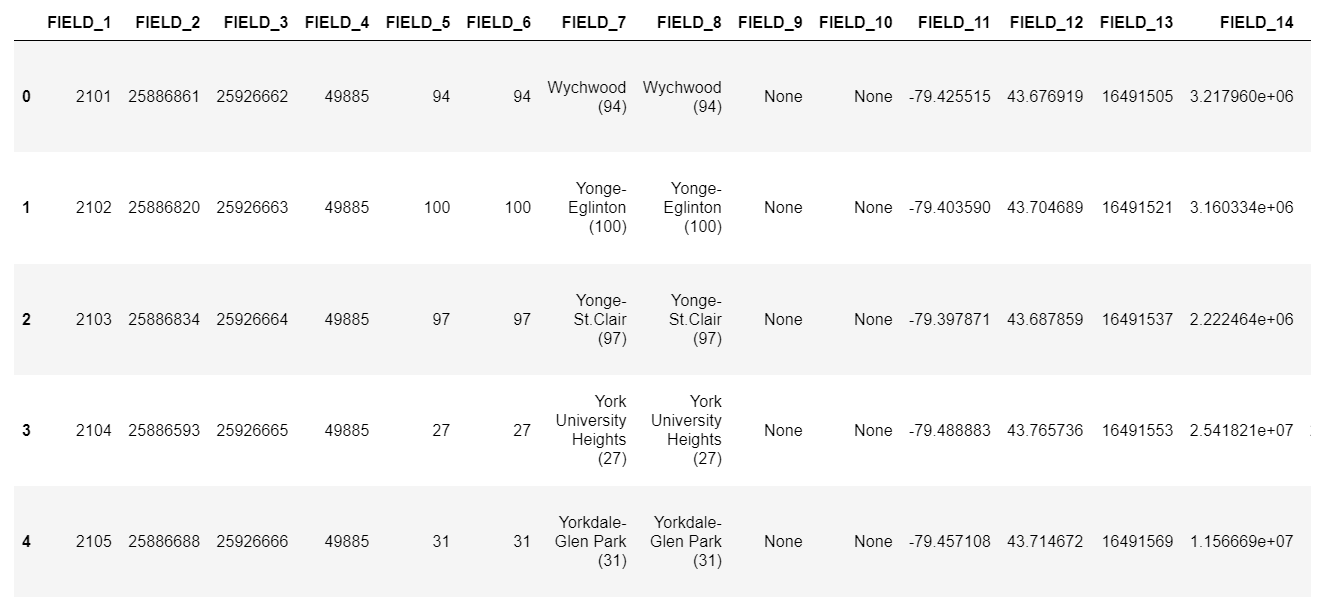

Note: `neighbourhoods` contains a number of columns we don't need and with generic names.

(2) Drop all columns except for `'geometry', and 'FIELD_8'`. 
<br> (3) Change the name of column `'FIELD_8'` to `'name'`. 
<br> (4) Remove the neighbourhood id from the name.

In [ ]:
neighbourhoods = neighbourhoods[['FIELD_8','geometry']].rename(columns = {'FIELD_8':'name'})
neighbourhoods['name'] = neighbourhoods['name'].str.split(pat = '(',expand = True)[0]

# View GeoDataFrame
neighbourhoods.head()

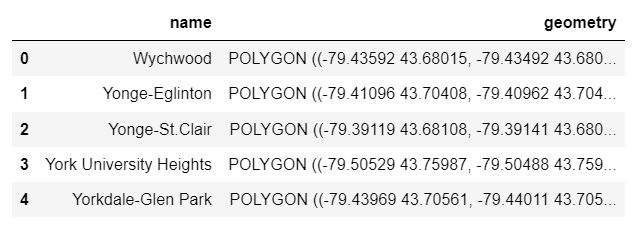

*Convert Station Locations DataFrame to a GeoDataFrame*
<br> Note: we imported the station location data as a stantard Pandas DataFrame.

In [39]:
bikeshare_stations.head()

,Station Id,Station Name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Wellesley Station Green P,43.664964,-79.383550,17
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,11


(1) Use `gpd.GeoDataFrame()` to create a GeoDataFrame from `bikeshare_stations` and assign the new GeoDataFrame to a new variable called `bikeshare_stations_gdf`.

Hint: The **geometry** argument for `gpd.GeoDataFrame()` can be assigned using [`gpd.points_from_xy()`](https://geopandas.org/reference/geopandas.points_from_xy.html) where (x,y) is (lon,lat).

In [40]:
bikeshare_stations_gdf = gpd.GeoDataFrame(bikeshare_stations, geometry = gpd.points_from_xy(bikeshare_stations['lon'],bikeshare_stations['lat']))
bikeshare_stations_gdf.head()

,Station Id,Station Name,lat,lon,capacity,geometry
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35,POINT (-79.39595 43.63983)
1,7001,Wellesley Station Green P,43.664964,-79.383550,17,POINT (-79.38355 43.66496)
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19,POINT (-79.39943 43.66733)
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15,POINT (-79.40276 43.66716)
4,7004,University Ave / Elm St,43.656518,-79.389099,11,POINT (-79.38910 43.65652)


*Generate Simple Plot*
<br> We can quickly visualize the data with the plot() method. Let's try it for `neighbourhoods`.

In [ ]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
bikeshare_stations_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Bike Stations')
plt.legend(fontsize=16)
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18);

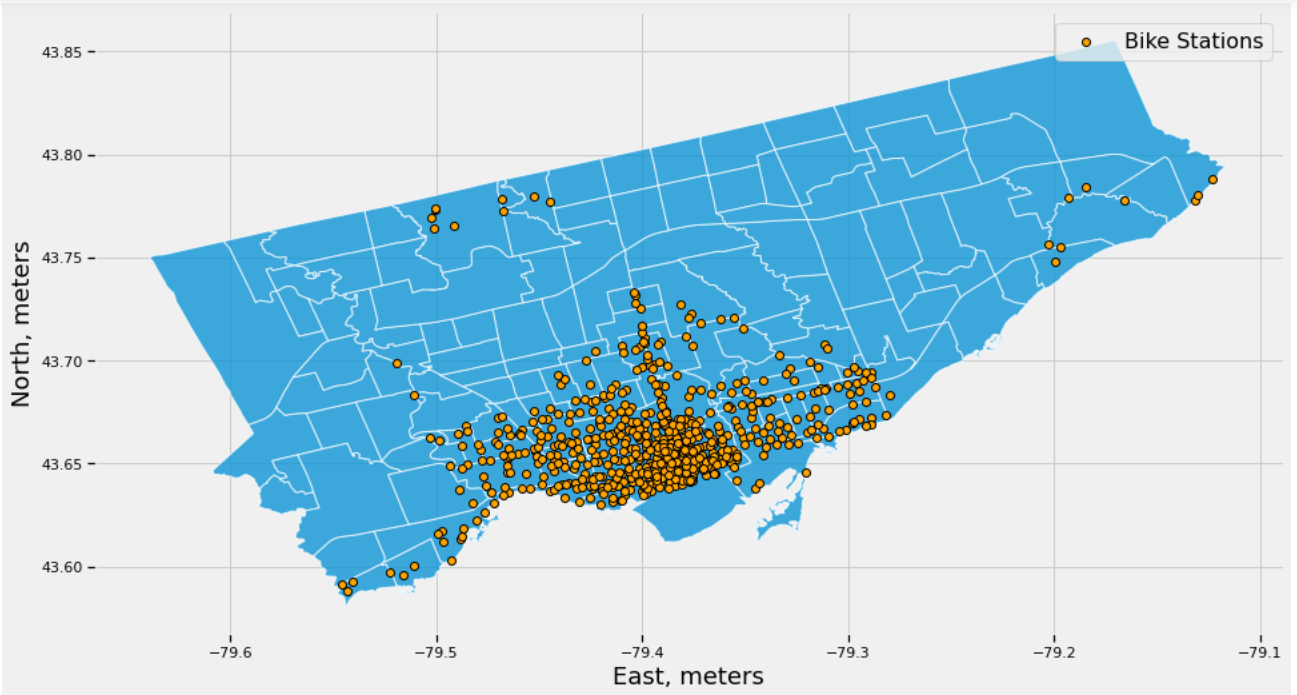

*Calculate the number of bike stations in each neighbourhood*
<br> Save this information as a new column named `'stations'` in the `neighbourhoods` GeoDataFrame.

In [ ]:
test = bikeshare_stations_gdf
neighbourhoods['stations'] = neighbourhoods.apply(lambda row : test.within(row.geometry).sum(),axis = 1)
neighbourhoods = neighbourhoods.sort_values('stations', ascending = False)
neighbourhoods.head(10)

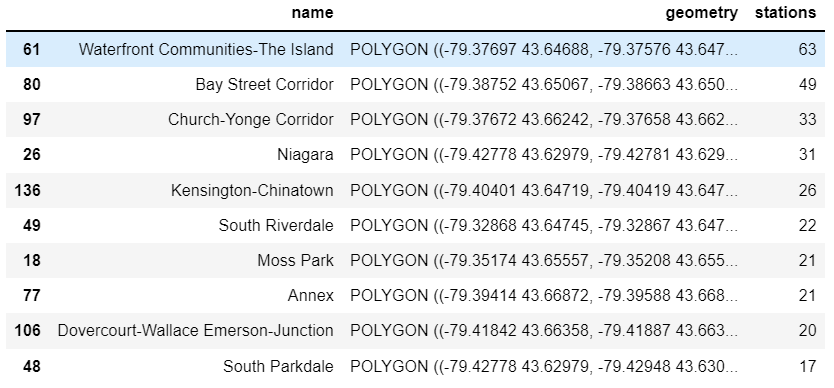

In [ ]:
test['geometry']

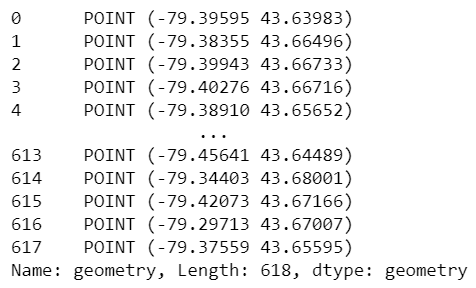

*Create a df that contains the stations and their corresponding neighborhoods*

In [ ]:
station_N = gpd.sjoin(test, neighbourhoods, how = "left", predicate='within')
station_N.head()

In [ ]:
station_neighbourhoods = station_N[['Station Id','Station Name','name']]
station_neighbourhoods = pd.DataFrame(station_neighbourhoods)

station_neighbourhoods.rename(columns={'name':'Neighbourhood'} ,inplace=True)
station_neighbourhoods.head()

In [ ]:
#station_neighbourhoods.to_csv('station_neighbourhoods.csv')

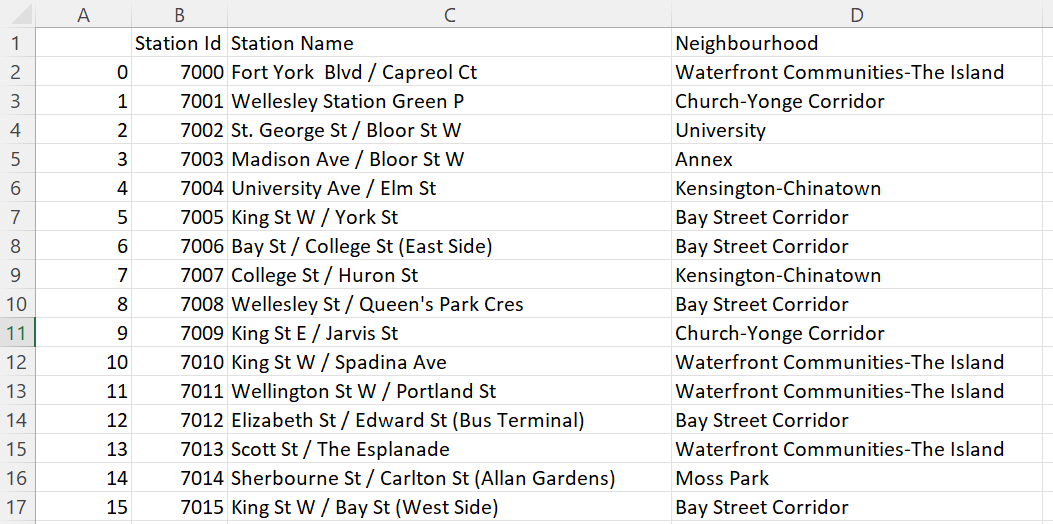

Note: station_neighbourhoods has 618 entries

***

## Make master list of station names and corresponding neighborhood

*Load the original station name:neighborhood data*

In [41]:
station_neighborhood = pd.read_csv(filepath_or_buffer = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\station_neighbourhoods.csv')
station_neighborhood.head()

,Unnamed: 0,Station Id,Station Name,Neighbourhood
0,0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,1,7001,Wellesley Station Green P,Church-Yonge Corridor
2,2,7002,St. George St / Bloor St W,University
3,3,7003,Madison Ave / Bloor St W,Annex
4,4,7004,University Ave / Elm St,Kensington-Chinatown


In [42]:
station_neighborhood = station_neighborhood.drop(columns = 'Unnamed: 0')
station_neighborhood.head()

,Station Id,Station Name,Neighbourhood
0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,7001,Wellesley Station Green P,Church-Yonge Corridor
2,7002,St. George St / Bloor St W,University
3,7003,Madison Ave / Bloor St W,Annex
4,7004,University Ave / Elm St,Kensington-Chinatown


In [43]:
station_neighborhood = station_neighborhood.rename(columns = {'Station Name':'Start Station Name'})
station_neighborhood.head()

,Station Id,Start Station Name,Neighbourhood
0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,7001,Wellesley Station Green P,Church-Yonge Corridor
2,7002,St. George St / Bloor St W,University
3,7003,Madison Ave / Bloor St W,Annex
4,7004,University Ave / Elm St,Kensington-Chinatown


In [44]:
station_neighborhood.shape

(618, 3)

Note: There was a lot of missing neighborhood names when merged 'AR_peakhrs' and 'station_neighborhood', which means that the 'station_neighborhood' df (based on the geo data) did not contain all the station names listed in the bike data

*Find the station names that are in the bike data ('AR_peakhrs') but not the geo data ('station_neighborhood')*

In [45]:
bike = list(AR_peakhrs['Start Station Name'].dropna().unique())
geo = list(station_neighborhood['Start Station Name'].unique())

not_matching = []
for stations in bike:
    if stations not in geo:
        not_matching.append(stations)

In [46]:
(not_matching)

['Beverly  St / Dundas St W',
 'Simcoe St / Wellington St W',
 'University Ave / Gerrard St W',
 'Bremner Blvd / Spadina Ave',
 'Simcoe St / Dundas St W',
 '424 Wellington St. W',
 'Widmer St / Adelaide St ',
 'Dockside Dr / Queens Quay E (Sugar Beach)',
 'Princess St / Adelaide St',
 "HTO Park (Queen's Quay W)",
 'College St W / Huron St',
 'Queens Park / Bloor St W',
 'Bloor St / Brunswick Ave',
 'Dundas St / Yonge St',
 'Ontario Place Blvd / Remembrance Dr',
 'College St W / Borden St',
 'Front St / Bay St (North Side)',
 'Sherbourne St / Wellesley St',
 'Rusholme Park Cres / College St W',
 'Fort York  Blvd / Capreol Crt',
 'College St W / Markham St',
 'University Ave / College St',
 'College St W / Major St',
 'College St W / Crawford St',
 'St George St / Bloor St W',
 'Victoria St / Gould St (Ryerson University)',
 'Seaton St / Dundas St E',
 'Beverly St / College St W',
 'University Ave / King St W',
 'Bay St / Bloor St W',
 'Temperance St / Yonge St',
 'Parliament St / Bloor 

In [47]:
not_matching_df = pd.DataFrame(not_matching, columns = ['not_matching'])
not_matching_df.head()

,not_matching
0,Beverly St / Dundas St W
1,Simcoe St / Wellington St W
2,University Ave / Gerrard St W
3,Bremner Blvd / Spadina Ave
4,Simcoe St / Dundas St W


In [55]:
not_matching_df.shape

(201, 2)

Note: an common issue we found in 'not_matching' was because the bike station name had 'SMART' attached to it while the geo station name did not -> so decided to 'fix' the smart name so could match it with a neighborhood

In [48]:
smart = not_matching_df[not_matching_df['not_matching'].str.contains('SMART')]
smart

,not_matching
55,Dovercourt Rd / Harrison St - SMART
58,Borden St / Bloor St W - SMART
60,York St / King St W - SMART
64,Summerhill Ave / MacLennan Ave - SMART
84,Morse St / Eastern Ave - SMART
...,...
192,20 Charles St E - SMART
193,Blake St / Boultbee Ave - SMART
195,Bloor St W / Pacific Ave - SMART
196,Lake Shore Blvd W / Colborne Lodge Dr - SMART


In [49]:
not_matching_df['fixed_smart'] = not_matching_df['not_matching'].apply(lambda x: x.split(' - ')[0] if 'SMART' in x else x)
not_matching_df.head()

,not_matching,fixed_smart
0,Beverly St / Dundas St W,Beverly St / Dundas St W
1,Simcoe St / Wellington St W,Simcoe St / Wellington St W
2,University Ave / Gerrard St W,University Ave / Gerrard St W
3,Bremner Blvd / Spadina Ave,Bremner Blvd / Spadina Ave
4,Simcoe St / Dundas St W,Simcoe St / Dundas St W


In [52]:
# need to get 'smart' stations that are in geo
smart_in_geo = not_matching_df[not_matching_df['fixed_smart'].isin(geo)]
smart_in_geo.head()

,not_matching,fixed_smart
84,Morse St / Eastern Ave - SMART,Morse St / Eastern Ave
86,Simcoe St / Michael Sweet Ave - SMART,Simcoe St / Michael Sweet Ave
87,80 Clinton St (North of College) - SMART,80 Clinton St (North of College)
89,424 Wellington St W - SMART,424 Wellington St W
90,Primrose Ave / Davenport Rd - SMART,Primrose Ave / Davenport Rd


In [53]:
# finding the neighborhood name for the 'smart' stations in geo
a = pd.merge(smart_in_geo, station_neighborhood, how = "left", left_on = "fixed_smart",right_on='Start Station Name')
b = a.drop(columns = ['fixed_smart','Station Id','Start Station Name'])
b = b.rename(columns={'not_matching': 'Station Name'})
b.head()

,Station Name,Neighbourhood
0,Morse St / Eastern Ave - SMART,South Riverdale
1,Simcoe St / Michael Sweet Ave - SMART,Kensington-Chinatown
2,80 Clinton St (North of College) - SMART,Palmerston-Little Italy
3,424 Wellington St W - SMART,Waterfront Communities-The Island
4,Primrose Ave / Davenport Rd - SMART,Dovercourt-Wallace Emerson-Junction


In [54]:
b.shape

(82, 2)

In [ ]:
#b.to_csv(path_or_buf = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\smart_in_geo.csv',index = False)

Note: even when we removed all the 'SMART' names, there are still some stations that are in bike and not in geo -> so decided to fix them using a name matching function

In [50]:
need_fixing = not_matching_df[~not_matching_df['fixed_smart'].isin(geo)]
need_fixing.reset_index(drop=True)

,not_matching,fixed_smart
0,Beverly St / Dundas St W,Beverly St / Dundas St W
1,Simcoe St / Wellington St W,Simcoe St / Wellington St W
2,University Ave / Gerrard St W,University Ave / Gerrard St W
3,Bremner Blvd / Spadina Ave,Bremner Blvd / Spadina Ave
4,Simcoe St / Dundas St W,Simcoe St / Dundas St W
...,...,...
114,Sheridan Ave / Dundas St W,Sheridan Ave / Dundas St W
115,25 York St GÃ‡Ã´ Union Station South,25 York St GÃ‡Ã´ Union Station South
116,Riverview Gardens - SMART,Riverview Gardens
117,25 York St GÇô Union Station South,25 York St GÇô Union Station South


In [ ]:
# exported the remaining station names to a csv so could work on it in a separate file
#need_fixing.to_csv(path_or_buf = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\need_fixing.csv',index = False)

*Fix the station names (code from external file)*

In [79]:
SN = station_neighborhood
SN.head()

,Station Id,Start Station Name,Neighbourhood,station removed SMART
0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island,Fort York Blvd / Capreol Ct
1,7001,Wellesley Station Green P,Church-Yonge Corridor,Wellesley Station Green P
2,7002,St. George St / Bloor St W,University,St. George St / Bloor St W
3,7003,Madison Ave / Bloor St W,Annex,Madison Ave / Bloor St W
4,7004,University Ave / Elm St,Kensington-Chinatown,University Ave / Elm St


In [80]:
SN = SN.rename(columns = {'Start Station Name':'Station Name'})
SN.head()

,Station Id,Station Name,Neighbourhood,station removed SMART
0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island,Fort York Blvd / Capreol Ct
1,7001,Wellesley Station Green P,Church-Yonge Corridor,Wellesley Station Green P
2,7002,St. George St / Bloor St W,University,St. George St / Bloor St W
3,7003,Madison Ave / Bloor St W,Annex,Madison Ave / Bloor St W
4,7004,University Ave / Elm St,Kensington-Chinatown,University Ave / Elm St


In [82]:
SN['station removed SMART'] = SN['Station Name'].apply(lambda x: x.split(' - ')[0] if 'SMART' in x else x)
station_list = SN['station removed SMART'].to_list()

In [83]:
SN.head()

,Station Id,Station Name,Neighbourhood,station removed SMART
0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island,Fort York Blvd / Capreol Ct
1,7001,Wellesley Station Green P,Church-Yonge Corridor,Wellesley Station Green P
2,7002,St. George St / Bloor St W,University,St. George St / Bloor St W
3,7003,Madison Ave / Bloor St W,Annex,Madison Ave / Bloor St W
4,7004,University Ave / Elm St,Kensington-Chinatown,University Ave / Elm St


In [84]:
fixed_smart_list = need_fixing['fixed_smart'].to_list()

In [85]:
# Define function to compare strings
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [86]:
# 'correct names' as index and 'typo names' as columns. Create a dataframe of all similarity scores.
similarity_df = pd.DataFrame({}, index=station_list)
for typo in fixed_smart_list:
  similarity_df[typo] = [similar(typo, correct_name) for correct_name in station_list]

similarity_df = similarity_df.reset_index()

In [87]:
similarity_df.head()

,index,Beverly St / Dundas St W,Simcoe St / Wellington St W,University Ave / Gerrard St W,Bremner Blvd / Spadina Ave,Simcoe St / Dundas St W,424 Wellington St. W,Widmer St / Adelaide St,Dockside Dr / Queens Quay E (Sugar Beach),Princess St / Adelaide St,...,Holland Park Ave / Oakwood Ave,Guildwood GO Station (North),135 Queen’s Wharf,Mutual St / Shuter St,25 York St â€“ Union Station South,Lake Shore Blvd E / Cherry St,Gailbraith Rd / KingGÃ‡Ã–s College Cr. (U of T),25 York St GÃ‡Ã´ Union Station South,25 York St GÇô Union Station South,Gailbraith Rd / KingGÇÖs College Cr. (U of T)
0,Fort York Blvd / Capreol Ct,0.339623,0.290909,0.245614,0.444444,0.313725,0.166667,0.307692,0.231884,0.339623,...,0.413793,0.107143,0.133333,0.244898,0.225806,0.491228,0.186667,0.218750,0.225806,0.191781
1,Wellesley Station Green P,0.360000,0.346154,0.259259,0.156863,0.250000,0.400000,0.285714,0.212121,0.280000,...,0.218182,0.415094,0.238095,0.260870,0.305085,0.296296,0.194444,0.295082,0.305085,0.200000
2,St. George St / Bloor St W,0.509804,0.603774,0.436364,0.307692,0.571429,0.217391,0.520000,0.238806,0.470588,...,0.285714,0.333333,0.232558,0.468085,0.433333,0.363636,0.219178,0.419355,0.433333,0.225352
3,Madison Ave / Bloor St W,0.408163,0.509804,0.528302,0.320000,0.468085,0.363636,0.291667,0.215385,0.204082,...,0.444444,0.307692,0.195122,0.311111,0.241379,0.377358,0.225352,0.233333,0.241379,0.231884
4,University Ave / Elm St,0.333333,0.200000,0.769231,0.326531,0.217391,0.279070,0.255319,0.250000,0.250000,...,0.377358,0.196078,0.150000,0.227273,0.140351,0.346154,0.257143,0.135593,0.140351,0.264706


In [88]:
# Find top 5 relevant correct names. Helps to check if the score makes sense
top_5_closest = pd.DataFrame({})
for typo in fixed_smart_list:
  similarity_df = similarity_df.sort_values(typo,ascending=False)
  index_list = similarity_df['index'].head().to_list()
  top_5_closest[typo] = index_list
top_5_closest

,Beverly St / Dundas St W,Simcoe St / Wellington St W,University Ave / Gerrard St W,Bremner Blvd / Spadina Ave,Simcoe St / Dundas St W,424 Wellington St. W,Widmer St / Adelaide St,Dockside Dr / Queens Quay E (Sugar Beach),Princess St / Adelaide St,HTO Park (Queen's Quay W),...,Holland Park Ave / Oakwood Ave,Guildwood GO Station (North),135 Queen’s Wharf,Mutual St / Shuter St,25 York St â€“ Union Station South,Lake Shore Blvd E / Cherry St,Gailbraith Rd / KingGÃ‡Ã–s College Cr. (U of T),25 York St GÃ‡Ã´ Union Station South,25 York St GÇô Union Station South,Gailbraith Rd / KingGÇÖs College Cr. (U of T)
0,Beverley St / Dundas St W,Simcoe St / Wellington St North,University Ave / Gerrard St W (WEST),Phoebe St / Spadina Ave,Simcoe St / Dundas St W,424 Wellington St W,Widmer St / Adelaide St W,York St / Queens Quay W,Princess St / Adelaide St E,HTO Park (Queens Quay W),...,Victoria Park Ave / Danforth Ave,Guildwood GO Station (South),135 Queens Wharf,Mutual St / Shuter St (Arena Gardens),25 York St – Union Station South,Lake Shore Blvd E / Leslie St,University Ave / College St (East),25 York St – Union Station South,25 York St – Union Station South,University Ave / College St (West)
1,Berkeley St / Dundas St E,Simcoe St / Wellington St South,University Ave / Gerrard St W (East Side),Queen St W / Spadina Ave,Simcoe St / Queen St W,Wellington St W / Bay St,Simcoe St / Adelaide St W,Lower Jarvis / Queens Quay E,Simcoe St / Adelaide St W,York St / Queens Quay W,...,Vaughan Rd / Oakwood Ave,York University Station (North),190 Queens Quay E,Dundonald St / Church St,York University Station (South),Lake Shore Blvd W / Louisa St,University Ave / College St (West),York University Station (South),York University Station (South),University Ave / College St (East)
2,Bloor St W / Dundas St W,Simcoe St / Queen St W,University Ave / Queen St W,Bremner Blvd / Rees St,Durie St / Dundas St W,Wellington St W / York St,Berkeley St / Adelaide St E,Bay St / Queens Quay W (Ferry Terminal),Bathurst St / Adelaide St W,190 Queens Quay E,...,Broadview Ave / Westwood Ave,Bloor GO / UP Station (West Toronto Railpath),1525 Dundas St,McGill St / Church St,York University Station (North),Lake Shore Blvd E / Knox Ave,Bay St / College St (West Side),York University Station (North),York University Station (North),Bay St / College St (East Side)
3,Durie St / Dundas St W,Simcoe St / Adelaide St W,University Ave / King St W,D'Arcy St / Spadina Ave,Simcoe St / Adelaide St W,Wellington St W / Portland St,Princess St / Adelaide St E,190 Queens Quay E,Berkeley St / Adelaide St E,Lower Jarvis / Queens Quay E,...,Howard Park Ave / Dundas St W,Rouge Hill GO Station,York St / Queens Quay W,Isabella St / Church St,York St / Lakeshore St W - South,Lake Shore Blvd W / Thirty Ninth Street,Bay St / College St (East Side),York St / Lakeshore St W - South,York St / Lakeshore St W - South,Bay St / College St (West Side)
4,Bathurst St / Dundas St W,Simcoe St / Dundas St W,University Ave / Armoury St,King St W / Spadina Ave,Seaton St / Dundas St E,Wellington St W / Stafford St,Bathurst St / Adelaide St W,Queens Quay W / Dan Leckie Way,Widmer St / Adelaide St W,Jimmie Simpson Park (Queen St E),...,Logan Ave / Bain Ave,Exhibition GO Station,The Queensway / High St,Baldwin St / Henry St,Simcoe St / Wellington St South,Lake Shore Blvd W / Windermere Ave,Yarmouth Rd / Christie St,Simcoe St / Wellington St South,Simcoe St / Wellington St South,Yarmouth Rd / Christie St


In [89]:
# Each typo corresponds to a list of possible correct names based on the specified similarity threshold. Now it is set at 0.8
by_threshold = pd.DataFrame({})
for typo in fixed_smart_list:
  similarity_df = similarity_df.sort_values(typo,ascending=False)
  index_list = similarity_df[similarity_df[typo]>0.8]['index'].to_list()
  by_threshold[typo] = [index_list, len(index_list)]

# Save a list of typos that cannot find relevant correct names at the threshold
bad_names_list = []
for typo in fixed_smart_list:
  if by_threshold[typo].iloc[1]==0:
    bad_names_list.append(typo)

# Count number of 0 matching names and adjust the threshold for similarity
count_bad_names = len(bad_names_list)

# Create dataframe for good_names and bad_names. Can check why bad_names exist
good_names = top_5_closest.drop(bad_names_list, axis=1)
bad_names = top_5_closest[bad_names_list]

In [90]:
bad_names

,Bremner Blvd / Spadina Ave,Dockside Dr / Queens Quay E (Sugar Beach),Ontario Place Blvd / Remembrance Dr,Victoria St / Gould St (Ryerson University),Bay St / Bloor St W,Temperance St / Yonge St,Parliament St / Bloor St E,Wellesley St E / Yonge St Green P,Bathurst St / Queens Quay W,Bloor GO / UP Station/ Rail Path,...,Torrens Ave / Broadview Ave,Riverview Gardens,Greenwood Subway Station,Holland Park Ave / Oakwood Ave,Mutual St / Shuter St,Gailbraith Rd / KingGÃ‡Ã–s College Cr. (U of T),Greenwood Subway Station,Sheridan Ave / Dundas St W,Riverview Gardens,Gailbraith Rd / KingGÇÖs College Cr. (U of T)
0,Phoebe St / Spadina Ave,York St / Queens Quay W,Ontario Place Blvd / Lake Shore Blvd W (East),Gould St / Yonge St (Ryerson University),Robert St / Bloor St W,Temperance St. Station,Parliament St / Gerrard St,Wellesley Station Green P,York St / Queens Quay W,Bloor GO / UP Station (West Toronto Railpath),...,Gamble Ave / Broadview Ave,Humberside Grounds,Woodbine Subway Station,Victoria Park Ave / Danforth Ave,Mutual St / Shuter St (Arena Gardens),University Ave / College St (East),Woodbine Subway Station,Palmerston Ave / Dundas St W,Humberside Grounds,University Ave / College St (West)
1,Queen St W / Spadina Ave,Lower Jarvis / Queens Quay E,Lake Shore Blvd W / Windermere Ave,Victoria St / Queen St E,Bay St / Bloor St W (West Side),Edward St / Yonge St,Parkside Dr / Bloor St W,Balliol St / Yonge St SMART,Bathurst St / Dundas St W,Cariboo St / Rail Path,...,Pretoria Av / Broadview Av,Dufferin Gate,Bathurst Subway Station,Vaughan Rd / Oakwood Ave,Dundonald St / Church St,University Ave / College St (West),Bathurst Subway Station,Priscilla Ave / Dundas St W,Dufferin Gate,University Ave / College St (East)
2,Bremner Blvd / Rees St,Bay St / Queens Quay W (Ferry Terminal),Hubbard Blvd. / Glen Manor Dr.,Bay St / College St (West Side),Bay St / Bloor St W (East Side),Beverley St / College St,Robert St / Bloor St W,Wellesley St / Queen's Park Cres,Bathurst St / Front St W,Guildwood GO Station (South),...,Thompson St / Broadview Ave,Gamble Ave / Broadview Ave,High Park Subway Station,Broadview Ave / Westwood Ave,McGill St / Church St,Bay St / College St (West Side),High Park Subway Station,Howard Park Ave / Dundas St W,Gamble Ave / Broadview Ave,Bay St / College St (East Side)
3,D'Arcy St / Spadina Ave,190 Queens Quay E,Bremner Blvd / Rees St,Bay St / Harbour St (West),Bay St / Albert St,Richmond St E / Yonge St,Church St / Bloor St E,Hillsdale Ave W / Yonge St,Bathurst St / Adelaide St W,25 York St – Union Station South,...,Dundas St E / Broadview Ave,Riverdale Park North (Broadview Ave),Lansdowne Subway Station,Howard Park Ave / Dundas St W,Isabella St / Church St,Bay St / College St (East Side),Lansdowne Subway Station,Carlaw Ave / Dundas St E,Riverdale Park North (Broadview Ave),Bay St / College St (West Side)
4,King St W / Spadina Ave,Queens Quay W / Dan Leckie Way,The Royal Ontario Museum (Bloor St Entrance),Bay St / Bloor St W (West Side),Yonge St / Bloor St,Dundas St W / Yonge St,Dufferin St / Bloor St,Beverley St / College St,Bathurst St / Lennox St,Long Branch GO Station,...,Logan Ave / Bain Ave,Riverdale Park South (Broadview Ave),Finch West Subway Station,Logan Ave / Bain Ave,Baldwin St / Henry St,Yarmouth Rd / Christie St,Finch West Subway Station,High Park Ave / Dundas St W,Riverdale Park South (Broadview Ave),Yarmouth Rd / Christie St


In [ ]:
#bad_names.to_csv('/content/drive/MyDrive/CIV1498 Project 2/Data/bad_names.csv')

In [ ]:
#good_names.to_csv('/content/drive/MyDrive/CIV1498 Project 2/Data/good_names.csv')

In [91]:
# Generate a dataframe to match corresponding typo names to the neighbhourhood
typo_names_list = good_names.columns
correct_names_list = good_names.iloc[0]
corrected_names = pd.DataFrame({'Typo names': typo_names_list, 'Corrected names': correct_names_list}).reset_index(drop=True)
corrected_names = corrected_names.merge(SN[['station removed SMART', 'Neighbourhood']], 
                                        how = 'left', left_on='Corrected names', right_on='station removed SMART')
corrected_names = corrected_names.drop(['Corrected names', 'station removed SMART'], axis = 1)
corrected_names.rename(columns = {'Typo names':'Station Name'}, inplace = True)

In [92]:
corrected_names.head()

,Station Name,Neighbourhood
0,Beverly St / Dundas St W,Kensington-Chinatown
1,Simcoe St / Wellington St W,Bay Street Corridor
2,University Ave / Gerrard St W,Kensington-Chinatown
3,Simcoe St / Dundas St W,Kensington-Chinatown
4,424 Wellington St. W,Waterfront Communities-The Island


In [93]:
corrected_names_withsmart = need_fixing.merge(corrected_names, how = 'left', left_on = 'fixed_smart', right_on='Station Name')
corrected_names_withsmart = corrected_names_withsmart.drop(columns=['fixed_smart', 'Station Name'])

corrected_names_withsmart = corrected_names_withsmart.rename(columns = {'not_matching': 'Station Name'})


In [94]:
corrected_names_withsmart.isna().sum()

Station Name      0
Neighbourhood    48
dtype: int64

In [95]:
corrected_names_withsmart[corrected_names_withsmart['Neighbourhood'].isna()]

,Station Name,Neighbourhood
3,Bremner Blvd / Spadina Ave,NaN
7,Dockside Dr / Queens Quay E (Sugar Beach),NaN
14,Ontario Place Blvd / Remembrance Dr,NaN
25,Victoria St / Gould St (Ryerson University),NaN
29,Bay St / Bloor St W,NaN
30,Temperance St / Yonge St,NaN
31,Parliament St / Bloor St E,NaN
32,Wellesley St E / Yonge St Green P,NaN
38,Bathurst St / Queens Quay W,NaN
39,Bloor GO / UP Station/ Rail Path,NaN


In [97]:
# Generate complete list of station names and neighbhourhood including typo names
station_neighbhourhoods_concat = pd.concat([SN[['Station Name', 'Neighbourhood']],corrected_names_withsmart])
station_neighbhourhoods_concat.head()

,Station Name,Neighbourhood
0,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,Wellesley Station Green P,Church-Yonge Corridor
2,St. George St / Bloor St W,University
3,Madison Ave / Bloor St W,Annex
4,University Ave / Elm St,Kensington-Chinatown


In [ ]:
# Save csv of final station_neighbhourhood data under the "stations" folder
#station_neighbhourhoods_concat.to_csv('/content/drive/MyDrive/CIV1498 Project 2/Data/station_neighbhourhoods_concat.csv')


Note: after name fixing with similiarities function, there were still 48 stations without neighborhoods -> so had to manually look them up and fill them in

*Load cvs file with (1) original geo data + (3) bike station names not 'SMART', names fixed and filled in*

In [214]:
station_neighborhood_concat_2 = pd.read_csv(filepath_or_buffer = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\station_neighbhourhoods_concat_2.csv')
station_neighborhood_concat_2 = station_neighborhood_concat_2.drop(columns = ['Unnamed: 0'])
station_neighborhood_concat_2.head()

,Station Name,Neighbourhood
0,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,Wellesley Station Green P,Church-Yonge Corridor
2,St. George St / Bloor St W,University
3,Madison Ave / Bloor St W,Annex
4,University Ave / Elm St,Kensington-Chinatown


In [215]:
station_neighborhood_concat_2.shape

(737, 2)

*Create a master list of station names and corresponding neighborhoods*
<br> Consits of: (1) original 'station_neighborhood' data from geo data (2) bike station names that did not match geo bc had 'SMART' in name "b" (3) bike station names not 'SMART' and not in geo that needed name fixing "station_neighborhood_concat"
<br> Note: "station_neighborhood_concat" = (1) and (3)

In [216]:
station_neighborhood_concat_FINAL = pd.concat([station_neighborhood_concat_2,b])
station_neighborhood_concat_FINAL.head()

,Station Name,Neighbourhood
0,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,Wellesley Station Green P,Church-Yonge Corridor
2,St. George St / Bloor St W,University
3,Madison Ave / Bloor St W,Annex
4,University Ave / Elm St,Kensington-Chinatown


In [101]:
station_neighborhood_concat_FINAL.shape

(819, 2)

Note: final station-neighborhood entries = 819 -> good

In [ ]:
#station_neighborhood_concat_FINAL = pd.read_csv(filepath_or_buffer = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\station_neighbhourhoods_concat_FINAL.csv')

***

## Merge Datasets
Merge bike share data and station/neighborhood data to get start neighborhood of each trip

In [217]:
# rename the column names so that they match
station_neighborhood_concat_FINAL = station_neighborhood_concat_FINAL.rename(columns = {'Station Name':'Start Station Name'})
station_neighborhood_concat_FINAL.head()

,Start Station Name,Neighbourhood
0,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island
1,Wellesley Station Green P,Church-Yonge Corridor
2,St. George St / Bloor St W,University
3,Madison Ave / Bloor St W,Annex
4,University Ave / Elm St,Kensington-Chinatown


*Merge AR_peakhrs and new station-neighborhood dataframes on start station name*

In [218]:
AR_SN_merge = AR_peakhrs.merge(station_neighborhood_concat_FINAL, left_on='Start Station Name',  right_on='Start Station Name', how='left')
AR_SN_merge.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Time_Int,Neighbourhood
0,712517.0,2017-01-01 07:47:00-05:00,2017-01-01 07:50:00-05:00,155.0,7006.0,Bay St / College St (East Side),7012.0,Elizabeth St / Edward St (Bus Terminal),Member,13:00,Bay Street Corridor
1,712518.0,2017-01-01 08:01:00-05:00,2017-01-01 08:10:00-05:00,563.0,7064.0,51 Parliament St,7033.0,Union Station,Member,13:30,Moss Park
2,712519.0,2017-01-01 08:06:00-05:00,2017-01-01 08:16:00-05:00,555.0,7027.0,Beverly St / Dundas St W,7026.0,Bay St / St. Joseph St,Member,14:00,Kensington-Chinatown
3,712520.0,2017-01-01 08:21:00-05:00,2017-01-01 08:27:00-05:00,342.0,7057.0,Simcoe St / Wellington St W,7168.0,Queens Quay / Yonge St,Member,14:30,Bay Street Corridor
4,712521.0,2017-01-01 08:23:00-05:00,2017-01-01 08:28:00-05:00,291.0,7120.0,Gerrard St E / River St,7104.0,King St E / River St,Member,15:00,Cabbagetown-South St.James Town


*Identify missing data*

In [219]:
AR_SN_merge.shape

(2733621, 11)

**Clean Merged Dadta**

In [220]:
AR_SN_merge_missing = AR_SN_merge.isnull().sum(axis = 0).to_frame('count')
AR_SN_merge_missing

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,298402
Start Station Name,447
End Station Id,299106
End Station Name,1188
User Type,0
Time_Int,2709261


*Drop missing 'start station name'*

In [221]:
AR_SN_FINAL = AR_SN_merge[~AR_SN_merge['Start Station Name'].isna()]

In [222]:
AR_SN_FINAL_miss = AR_SN_FINAL.isnull().sum(axis = 0).to_frame('count')
AR_SN_FINAL_miss

,count
Trip Id,0
Start Time,0
End Time,0
Trip Duration,0
Start Station Id,298402
Start Station Name,0
End Station Id,299105
End Station Name,1182
User Type,0
Time_Int,2708814


Note: no missing 'start station name' or 'neighborhood' -> good

In [223]:
AR_SN_FINAL.columns

Index(['Trip Id', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station Id', 'Start Station Name', 'End Station Id',
       'End Station Name', 'User Type', 'Time_Int', 'Neighbourhood'],
      dtype='object')

*Remove not-needed columns: 'start station id', 'end station id', 'time int'*

In [224]:
AR_SN_FINAL = AR_SN_FINAL.drop(columns = ['Start Station Id','End Station Id','Time_Int'])
AR_SN_FINAL.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Name,End Station Name,User Type,Neighbourhood
0,712517.0,2017-01-01 07:47:00-05:00,2017-01-01 07:50:00-05:00,155.0,Bay St / College St (East Side),Elizabeth St / Edward St (Bus Terminal),Member,Bay Street Corridor
1,712518.0,2017-01-01 08:01:00-05:00,2017-01-01 08:10:00-05:00,563.0,51 Parliament St,Union Station,Member,Moss Park
2,712519.0,2017-01-01 08:06:00-05:00,2017-01-01 08:16:00-05:00,555.0,Beverly St / Dundas St W,Bay St / St. Joseph St,Member,Kensington-Chinatown
3,712520.0,2017-01-01 08:21:00-05:00,2017-01-01 08:27:00-05:00,342.0,Simcoe St / Wellington St W,Queens Quay / Yonge St,Member,Bay Street Corridor
4,712521.0,2017-01-01 08:23:00-05:00,2017-01-01 08:28:00-05:00,291.0,Gerrard St E / River St,King St E / River St,Member,Cabbagetown-South St.James Town


In [225]:
AR_SN_FINAL.shape

(2733174, 8)

Note: total number of ridership data that will be analyzed = 2,733,174 (compared to AR_peakhrs = 2733621)(lost 447 rides)

***

## Census Data

*Load census data*

In [111]:
df_census = pd.read_csv(filepath_or_buffer = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\neighbourhood-profiles-2016-csv.csv')
df_census.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,_id
0,129,128,20,95,42,34,76,52,49,39,...,7,137,64,60,94,100,97,27,31,1
1,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,...,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood,2
2,"29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236",...,"22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804",3
3,"30,279","21,988","11,904","29,177","26,918","15,434","19,348","17,671","13,530","23,185",...,"21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687",4
4,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,-2.80%,0.20%,...,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%,5


*Clean data*

In [112]:
# Drop columns that are not neighbhourhoods
df_census = df_census.drop(['Category', 'Data Source', 'Topic', '_id'], axis=1)

# Transpose to get neighbhourhood names as rows and characteristics as columns
census_clean1 = df_census.set_index(['Characteristic']).transpose()
census_clean1.head()

Characteristic,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Children (0-14 years),...,Intraprovincial migrants,Interprovincial migrants,External migrants,Total - Mobility status 5 years ago - 25% sample data,Non-movers,Movers,Non-migrants,Migrants,Interprovincial migrants,External migrants
Agincourt North,129,No Designation,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41,"3,840",...,275,75,605,"27,490","18,865","8,610","5,445","3,170",135,"2,280"
Agincourt South-Malvern West,128,No Designation,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83,"3,075",...,320,90,490,"22,325","13,565","8,775","5,610","3,145",220,"2,170"
Alderwood,20,No Designation,"12,054","11,904",1.30%,"4,732","4,616","2,435",4.95,"1,760",...,220,40,70,"11,370","8,235","3,130","2,200",925,70,245
Annex,95,No Designation,"30,526","29,177",4.60%,"18,109","15,934","10,863",2.81,"2,360",...,900,385,835,"27,715","12,980","14,735","8,340","6,390","1,310","2,460"
Banbury-Don Mills,42,No Designation,"27,695","26,918",2.90%,"12,473","12,124","2,775",9.98,"3,605",...,345,75,380,"25,925","16,300","9,625","6,480","3,140",220,"1,735"


In [113]:
# DataFrame of age class for each neighbhourhood

census_clean1_ageclass = census_clean1[['Children (0-14 years)', 'Youth (15-24 years)', 'Working Age (25-54 years)',
                                  'Pre-retirement (55-64 years)', 'Seniors (65+ years)', 'Older Seniors (85+ years)']]
census_clean1_ageclass.head()

Characteristic,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years)
Agincourt North,"3,840","3,705","11,305","4,230","6,045",925
Agincourt South-Malvern West,"3,075","3,360","9,965","3,265","4,105",555
Alderwood,"1,760","1,235","5,220","1,825","2,015",320
Annex,"2,360","3,750","15,040","3,480","5,910","1,040"
Banbury-Don Mills,"3,605","2,730","10,810","3,555","6,975","1,640"


In [114]:
# Extract column names for Male and Female population by age bins

columns_list = census_clean1.columns.to_list()

screened_age_bins_col = list(category for category in columns_list if ('Male: ' in category or 'Female: ' in category))

age_bins=[]
for row in screened_age_bins_col: age_bins.append(row.split(' ', 1)[1])
age_bins_clean = list(set(age_bins))

In [115]:
# DataFrame of census data in agebins by gender
census_clean1_agebins_by_gender = census_clean1[screened_age_bins_col]
census_clean1_agebins_by_gender.head()

# DataFrame of census data by agebins with male and female combined
census_clean1_agebins = pd.DataFrame({})

for bin in age_bins_clean:
  census_clean1_agebins[bin] = census_clean1[str('Male: ' + bin)].str.replace(',','').astype(float) + census_clean1[str('Female: ' + bin)].str.replace(',','').astype(float)

census_clean1_agebins = census_clean1_agebins[census_clean1_agebins.columns.sort_values()]

In [116]:
census_clean1_agebins.head()

,0 to 04 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,...,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years
Agincourt North,1280.0,1315.0,1255.0,10.0,1705.0,1990.0,2020.0,1770.0,1455.0,1670.0,...,2450.0,2225.0,1995.0,1910.0,1280.0,1065.0,865.0,560.0,260.0,85.0
Agincourt South-Malvern West,1105.0,1035.0,935.0,0.0,1470.0,1895.0,2020.0,1655.0,1340.0,1355.0,...,1945.0,1765.0,1505.0,1320.0,875.0,755.0,590.0,360.0,145.0,40.0
Alderwood,680.0,595.0,480.0,5.0,575.0,665.0,705.0,840.0,905.0,865.0,...,1030.0,1025.0,790.0,625.0,415.0,335.0,315.0,195.0,105.0,15.0
Annex,925.0,765.0,680.0,30.0,1015.0,2735.0,4345.0,3285.0,2095.0,1750.0,...,1855.0,1770.0,1695.0,1730.0,1340.0,1050.0,760.0,575.0,340.0,115.0
Banbury-Don Mills,1070.0,1260.0,1275.0,25.0,1375.0,1350.0,1390.0,1595.0,1630.0,1790.0,...,2225.0,1935.0,1625.0,1670.0,1360.0,1235.0,1085.0,955.0,535.0,125.0


In [117]:
# DataFrame of census data on main mode of commuting be bicycle

census_bicycle_main_mode = census_clean1[['  Bicycle']]
census_bicycle_main_mode.head()

Characteristic,Bicycle
Agincourt North,70
Agincourt South-Malvern West,35
Alderwood,65
Annex,"1,675"
Banbury-Don Mills,65


In [118]:
# DataFrame of census data on family sizes

family_size_index = census_clean1.columns.get_loc('Census families in private households by family size')
family_size_index

df_family_size = census_clean1.iloc[:, family_size_index:family_size_index+6]
df_family_size.head()

Characteristic,Census families in private households by family size,2 persons,3 persons,4 persons,5 or more persons,Couples without children
Agincourt North,8430,3570,2390,1875,605,2520
Agincourt South-Malvern West,6650,2970,1835,1325,520,2095
Alderwood,3480,1605,900,755,220,1175
Annex,6710,4475,1195,805,215,3830
Banbury-Don Mills,7600,3925,1760,1500,435,3015


In [119]:
# Merge all DataFrame information from census

total_census_df_list = [census_clean1_ageclass, census_clean1_agebins, census_bicycle_main_mode, df_family_size]

df_census_merged = pd.concat(total_census_df_list, join='outer', axis=1)

In [120]:
df_census_merged.head()

,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),0 to 04 years,05 to 09 years,10 to 14 years,100 years and over,...,85 to 89 years,90 to 94 years,95 to 99 years,Bicycle,Census families in private households by family size,2 persons,3 persons,4 persons,5 or more persons,Couples without children
Agincourt North,"3,840","3,705","11,305","4,230","6,045",925,1280.0,1315.0,1255.0,10.0,...,560.0,260.0,85.0,70,8430,3570,2390,1875,605,2520
Agincourt South-Malvern West,"3,075","3,360","9,965","3,265","4,105",555,1105.0,1035.0,935.0,0.0,...,360.0,145.0,40.0,35,6650,2970,1835,1325,520,2095
Alderwood,"1,760","1,235","5,220","1,825","2,015",320,680.0,595.0,480.0,5.0,...,195.0,105.0,15.0,65,3480,1605,900,755,220,1175
Annex,"2,360","3,750","15,040","3,480","5,910","1,040",925.0,765.0,680.0,30.0,...,575.0,340.0,115.0,"1,675",6710,4475,1195,805,215,3830
Banbury-Don Mills,"3,605","2,730","10,810","3,555","6,975","1,640",1070.0,1260.0,1275.0,25.0,...,955.0,535.0,125.0,65,7600,3925,1760,1500,435,3015


In [121]:
df_census_merged.columns

Index(['Children (0-14 years)', 'Youth (15-24 years)',
       'Working Age (25-54 years)', 'Pre-retirement (55-64 years)',
       'Seniors (65+ years)', 'Older Seniors (85+ years)', '0 to 04 years',
       '05 to 09 years', '10 to 14 years', '100 years and over',
       '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
       '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years',
       '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years',
       '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years',
       '95 to 99 years', '  Bicycle',
       'Census families in private households by family size', '  2 persons',
       '  3 persons', '  4 persons', '  5 or more persons',
       '  Couples without children'],
      dtype='object')

***

# Calculate rider utilization ratio
<br> (1) determine the total number of rides per neighborhood (...use groupby function)
<br> (2) calculate rider utilization based on cenesus data (workers that commute by bike)
<br> (3) determine the mean utilization ratio and set as initial threshold
<br> (4) determine other thresholds to plot and justify reasoning

*determine the total number of rides per neighborhood for the bike data*

In [226]:
AR_SN_FINAL_Nrides = AR_SN_FINAL.groupby('Neighbourhood').count()
AR_SN_FINAL_Nrides.head()

,Trip Id,Start Time,End Time,Trip Duration,Start Station Name,End Station Name,User Type
Neighbourhood,,,,,,,
Annex,88425,88425,88425,88425,88425,88390,88425
Bathurst Manor,263,263,263,263,263,263,263
Bay Street Corridor,509735,509735,509735,509735,509735,509528,509735
Birchcliffe-Cliffside,92,92,92,92,92,92,92
Blake-Jones,1219,1219,1219,1219,1219,1218,1219


In [227]:
bikeshare_rides = pd.DataFrame(AR_SN_FINAL_Nrides['Trip Id']).reset_index()
bikeshare_rides.head()

,Neighbourhood,Trip Id
0,Annex,88425
1,Bathurst Manor,263
2,Bay Street Corridor,509735
3,Birchcliffe-Cliffside,92
4,Blake-Jones,1219


In [228]:
bikeshare_rides['Neighbourhood'] = bikeshare_rides['Neighbourhood'].str.rstrip()
bikeshare_rides['Neighbourhood'].to_list()

['Annex',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Birchcliffe-Cliffside',
 'Blake-Jones',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Cabbagetown-South St.James Town',
 'Casa Loma',
 'Church-Yonge Corridor',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Dovercourt-Wallace Emerson-Junction',
 'Dufferin Grove',
 'East End-Danforth',
 'Flemingdon Park',
 'Forest Hill North',
 'Forest Hill South',
 'Greenwood-Coxwell',
 'Guildwood',
 'High Park North',
 'High Park-Swansea',
 'Highland Creek',
 'Humber Heights-Westmount',
 'Humewood-Cedarvale',
 'Junction Area',
 'Kensington-Chinatown',
 'Kingsway South',
 'Lambton Baby Point',
 'Lawrence Park North',
 'Leaside-Bennington',
 'Little Portugal',
 'Long Branch',
 'Mimico',
 'Morningside',
 'Moss Park',
 'Mount Pleasant East',
 'Mount Pleasant West',
 'New Toronto',
 'Niagara',
 'North Riverdale',
 'North St.James Town',
 "O'Connor-Parkview",
 'Oakridge',
 'Oakwood Village',
 'Old East York',
 'Palmerston

In [230]:
AR_SN_FINAL_Nrides.shape

(75, 7)

*get the neighborhood riders from the census data*

In [231]:
census_rides = pd.DataFrame([])
census_rides['Rides'] = df_census_merged['  Bicycle']
census_rides = census_rides.reset_index()

census_rides.head()

,index,Rides
0,Agincourt North,70
1,Agincourt South-Malvern West,35
2,Alderwood,65
3,Annex,"1,675"
4,Banbury-Don Mills,65


In [232]:
census_rides['index'].to_list()

['Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'City of Toronto',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdon Park',


In [233]:
census_rides.shape

(141, 2)

Note: there are more neighborhoods from the census data than the bike share data (makes sense)

*make new df with columns: neighborbood, bike Nrides, census Nrides*

In [234]:
ALL_RIDES = bikeshare_rides.merge(census_rides, how = "left", left_on = "Neighbourhood", right_on = "index")
ALL_RIDES.head()

,Neighbourhood,Trip Id,index,Rides
0,Annex,88425,Annex,"1,675"
1,Bathurst Manor,263,Bathurst Manor,15
2,Bay Street Corridor,509735,Bay Street Corridor,325
3,Birchcliffe-Cliffside,92,Birchcliffe-Cliffside,140
4,Blake-Jones,1219,Blake-Jones,305


In [235]:
ALL_RIDES = ALL_RIDES.drop(columns =["index"])
ALL_RIDES.rename(columns = {'Trip Id':'BikeShare Rides', 'Rides':'Census Rides'}, inplace = True)
# remove the , from census rides in order to perform mathematical functions
ALL_RIDES['Census Rides'] = ALL_RIDES['Census Rides'].str.replace(',','').fillna(value = 0).astype(int)
ALL_RIDES.head()

,Neighbourhood,BikeShare Rides,Census Rides
0,Annex,88425,1675
1,Bathurst Manor,263,15
2,Bay Street Corridor,509735,325
3,Birchcliffe-Cliffside,92,140
4,Blake-Jones,1219,305


In [236]:
ALL_RIDES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Neighbourhood    75 non-null     object
 1   BikeShare Rides  75 non-null     int64 
 2   Census Rides     75 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 2.1+ KB


*add column to ALL_RIDES to calculate the rider utilization ratio*
<br> RU = bike share rides / census rides

In [237]:
# multople census rides by 5 years by 2 directions (i.e. to and from work) by 261 weekdays
ALL_RIDES['Rider Utilization'] = ALL_RIDES['BikeShare Rides']/(ALL_RIDES['Census Rides']*5*2*261)
ALL_RIDES.head()

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization
0,Annex,88425,1675,0.020226
1,Bathurst Manor,263,15,0.006718
2,Bay Street Corridor,509735,325,0.600925
3,Birchcliffe-Cliffside,92,140,0.000252
4,Blake-Jones,1219,305,0.001531


In [238]:
ALL_RIDES['Rider Utilization'].replace([np.inf, -np.inf], 0, inplace=True)
ALL_RIDES.mean()

BikeShare Rides      36442.320000
Census Rides           398.266667
Rider Utilization        0.021821
dtype: float64

In [246]:
ALL_RIDES.shape

(75, 4)

*determine mean or median utilization ratio to use as initial threshold for plot*

In [247]:
Bike_Census_Utilization = ALL_RIDES
#Bike_Census_Utilization = Bike_Census_Utilization[(Bike_Census_Utilization['Neighbourhood'] != 'ernie') & (Bike_Census_Utilization['Neighbourhood'] != 'lee')]
#Bike_Census_Utilization.shape

(74, 4)

In [ ]:
Bike_Census_Utilization.mean()

In [240]:
Bike_Census_Utilization.to_csv(path_or_buf = r'C:\Users\giuli\Documents\Jupiter Notebks\P2\Bike_Census_Utilization.csv',index = False )

In [241]:
Bike_Census_Utilization.median()

BikeShare Rides      2833.000000
Census Rides          235.000000
Rider Utilization       0.004162
dtype: float64

*determine IQR for another threshold for plot*

In [242]:
data = Bike_Census_Utilization['Rider Utilization']
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

0.001551096036681113
0.011154932551938966
0.009603836515257853


***

# Plot the rider utilzation based on several thresholds
<br> Note: could not do it on local drive, so had to do on external file associated with 'CIV1498-winter-2022-material' Jupiter Hub

*Plot 1: using median as threshold*
<br> good = 38 | bad = 35 | NaN = 67

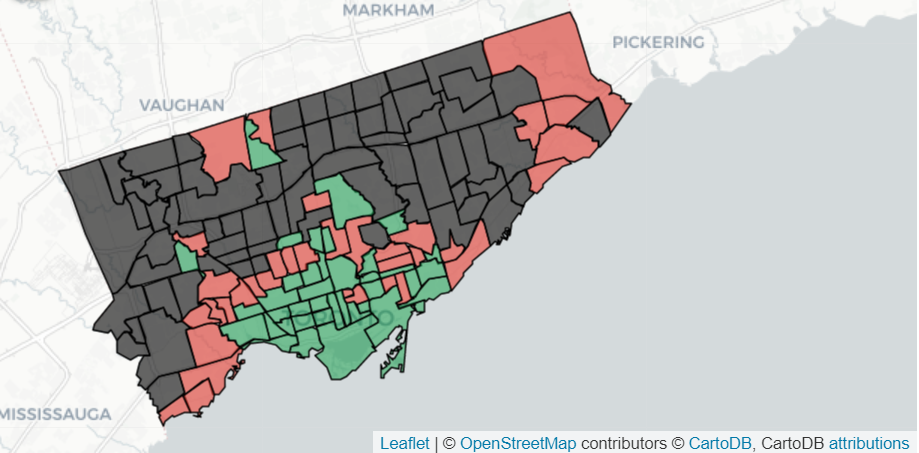

*Plot 2: using IQR as threshold*
<br> underserving = 19 | good = 37 | over serving = 17 | NaN = 67

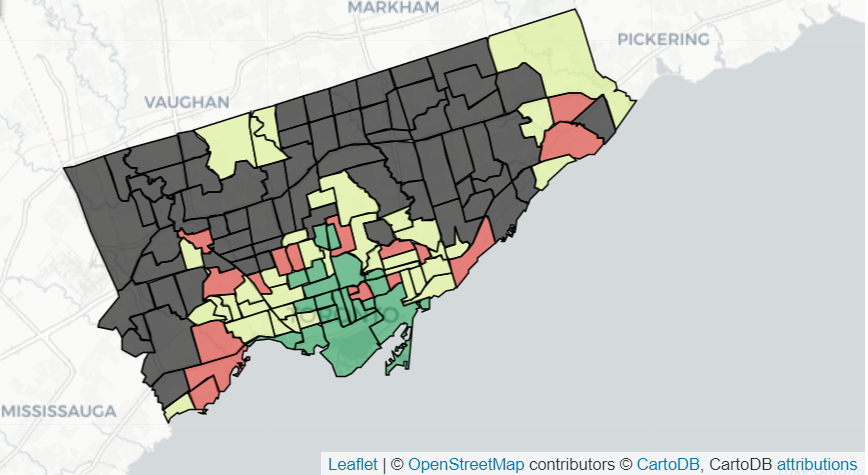

*Plot 3: number of additional bikes needed*

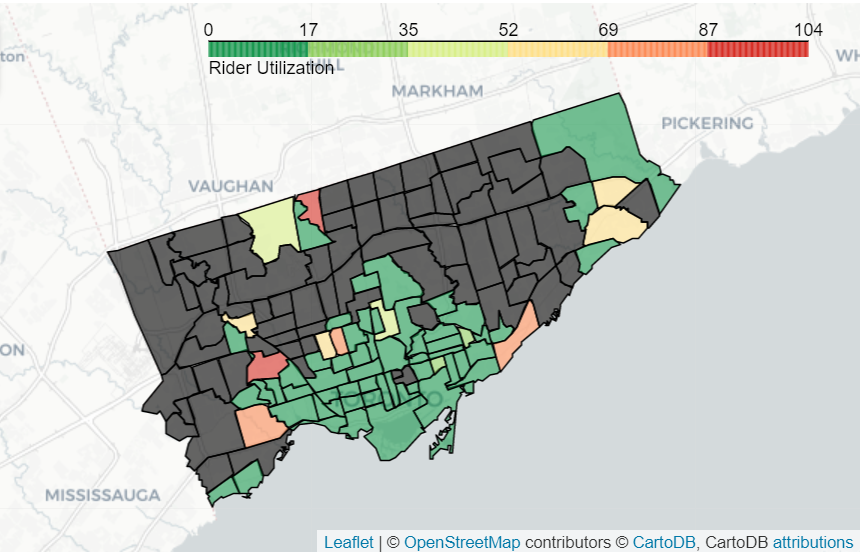

# OBSERVATIONS
...